<a href="https://colab.research.google.com/github/LusiferAjay/Devanagari-character-set/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Modules

In [0]:
#standard useful data processing imports
import random
import numpy as np
import pandas as pd
#visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
#Scikit learn for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#keras imports
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [0]:

# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

In [0]:
dataset=pd.read_csv('/content/drive/My Drive/data.csv')

In [0]:
print(dataset.head())

In [0]:
dataset.shape

In [0]:
df=dataset['character'].value_counts()
print(type(df))

In [0]:
df=dataset['character'].value_counts()
print(type(df))

In [0]:
x=dataset.values[:,:-1]/255.0
y=dataset['character'].values
del dataset
n_classes=46

In [0]:
print(type(x),type(y))

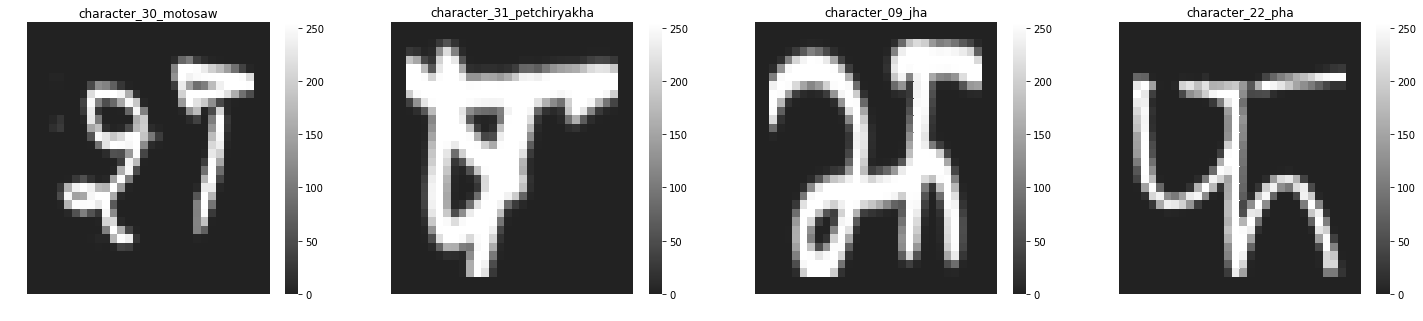

In [45]:
img_width_cols=32
img_height_rows=32
customcmap=sns.dark_palette("white",as_cmap=True)
random_idxs=random.sample(range(1,len(y)),4)
plt_dims=(25,5)
f, axarr = plt.subplots(1, 4, figsize=plt_dims)
it = 0
for idx in random_idxs:
    image = x[idx,:].reshape(img_width_cols,img_height_rows)*255
    axarr[it].set_title(y[idx])
    axarr[it].axis('off')
    sns.heatmap(data=image.astype(np.uint8),cmap=customcmap,ax=axarr[it])
    it=it+1

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)
y_train=to_categorical(y_train,n_classes)
y_test=to_categorical(y_test,n_classes)

In [47]:
x_train.shape

(73600, 1024)

In [0]:

im_shape=(img_height_rows,img_width_cols,1)
x_train=x_train.reshape(x_train.shape[0],*im_shape)
x_test=x_test.reshape(x_test.shape[0],*im_shape)

In [0]:
cnn = Sequential()


In [0]:
kernelSize=(3,3)
ip_activation="relu"
ip_conv0=Conv2D(filters=32,kernel_size=kernelSize,input_shape=im_shape,activation=ip_activation)
cnn.add(ip_conv0)

In [0]:
ip_conv_0_1=Conv2D(filters=64,kernel_size=kernelSize,activation=ip_activation)
cnn.add(ip_conv_0_1)

In [0]:
pool_0=MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same")

In [0]:

cnn.add(pool_0)
ip_conv_1=Conv2D(filters=64,kernel_size=kernelSize,activation=ip_activation)
cnn.add(ip_conv_1)
pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_1)

In [0]:
drop_layer_0 = Dropout(0.2)
cnn.add(drop_layer_0)

In [0]:
flat_layer_0=Flatten()
cnn.add(Flatten())


In [0]:
h_dense_0=Dense(units=128,activation=ip_activation,kernel_initializer='uniform')
cnn.add(h_dense_0)
h_dense_1=Dense(units=64,activation=ip_activation,kernel_initializer='uniform')
cnn.add(h_dense_1)

In [0]:
op_activation='softmax'
output_layer=Dense(units=n_classes,activation=op_activation,kernel_initializer='uniform')
cnn.add(output_layer)

In [0]:
opt='adam'
loss='categorical_crossentropy'
metrics=['accuracy']
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)

In [0]:
history = cnn.fit(x_train, y_train,
                  batch_size=32, epochs=10,
                  validation_data=(x_test, y_test))

In [61]:
scores=cnn.evaluate(x_test,y_test,verbose=0)
print("Accuracy:%.2f%%" % (scores[1]*100))

Accuracy:97.85%


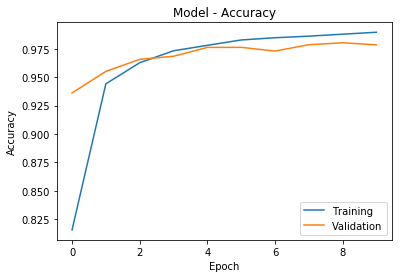

In [62]:
print(history)
fig1, ax_acc = plt.subplots()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

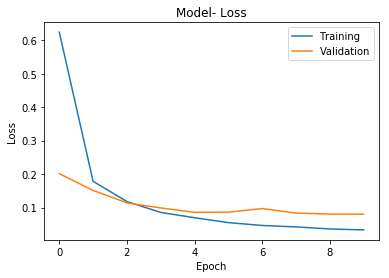

In [65]:
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'],loc='upper right')
plt.show()